#Implementing Multiple Linear Regression
Dataset Used: Iris Dataset

Features: 
* Sepal Width (SW)
* Petal Length (PL)
* Petal Width (PW)

Parameter to be predicted: Sepal Length (SL)

In [ ]:
#loading dataset
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
x = data['data']
#separation of data into x and y
y = x[:,0]
x = x[:,1:4]

In [ ]:
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
type(data)
type(x)

numpy.ndarray

We have $Y = βX$, where

$β = (X^TX)^{-1}X^{T}Y$ 

In [ ]:
#implementation using sklearn
#splitting dataset into train set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=0)


In [ ]:
#creating model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

[ 1.11833096  0.87349176 -0.81477536]
[5.63067381 5.1395198  5.75692343 7.27956223 4.94960784 6.89450434
 4.80526505 6.35007422 6.18340164 5.56608577 6.65852885 6.28720896
 6.25900753 5.92722575 6.20788556 5.16740239 5.95170967 5.77329381
 4.33344874 5.1711199  5.7818856  6.06354277 5.29900454 4.30309318
 5.85749149 4.73652815 5.58338186 5.93996639 4.63990866 4.87400194
 6.80443502 6.06354277 5.06144094 6.16850686 6.23037476 5.28542596
 5.49016104 6.170661  ]


Text(0.5, 1.0, 'Y_pred and Y_test')

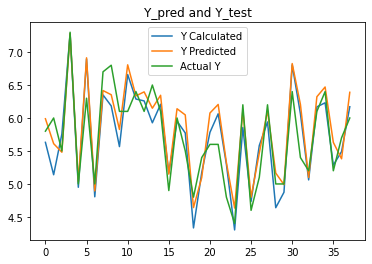

In [ ]:
#plotting results
import matplotlib.pyplot as plt
import numpy as np
x = x_test
x_T = x.transpose()
x_T_x = x_T.dot(x)
x_T_x_inv = np.linalg.inv(x_T_x)
beta = x_T_x_inv.dot(x_T).dot(y_test)
print(beta)
beta_x = beta.dot(x_T)
print(beta_x)
plt.plot(np.arange(len(beta_x)),beta_x)
plt.plot(np.arange(len(x_test)),y_pred)
plt.plot(np.arange(len(x_test)),y_test)
plt.legend(['Y Calculated', 'Y Predicted','Actual Y'])
plt.title('Y_pred and Y_test')

In [ ]:
#printing values(actual, predicted, calculated)
for i,j,k in zip(y_test,y_pred,beta_x):
  print(i,j,k,end = '\n')

5.8 5.988568062296453 5.630673806402943
6.0 5.610880488757983 5.139519797397984
5.5 5.480897016095339 5.7569234327247925
7.3 7.27915890072004 7.279562231292252
5.0 5.033216174753967 4.949607839181894
6.3 6.912652564409241 6.894504335679544
5.0 4.894049196512652 4.805265047264046
6.7 6.416250674262077 6.350074215223886
6.8 6.352257109593764 6.1834016387100315
6.1 5.826585565665903 5.566085766457515
6.1 6.8060269612189845 6.6585288546093695
6.4 6.3353502805683215 6.287208959347781
6.1 6.395798012629456 6.259007534756735
6.5 6.14800599292735 5.927225750594722
6.1 6.3443489819594365 6.20788555887071
4.9 5.1486587700922986 5.167402391581776
6.0 6.140097865293022 5.951709670755401
5.5 6.046652937600974 5.773293814251469
4.8 4.641620770446581 4.333448742313528
5.4 5.096119165665494 5.171119896012144
5.6 6.075649868367836 5.781885598496352
5.6 6.2051820037181225 6.06354276695286
4.8 5.325185238991677 5.299004543329024
4.4 4.63480321656904 4.30309318215781
6.2 6.1191907714035265 5.8574914945430